# part 1:
Create your own SVC class and configure it with different kernels to see if you are able to have it correctly separate the moon-dataset. You can also use a precomputed kernel. In addition, there are several parameters you can tune to for better results. Make sure to go through the documentation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
# from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
X, y = make_moons(n_samples=200, random_state=0, shuffle=True)

X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]

### provides different kernels for the Support Vector Classifier, e.g. RBF or polynomial.

sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

C: float, default=1.0

Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

degree: int, default=3

Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

In [3]:
def make_meshgrid(X, h=.01):
    """Create a mesh grid based on vectors X and Y."""
    if X.shape[1] > 2:
        raise ValueError('Requires a matrix of 2 features for visualization purposes.')
    
    x_min = X.min() - 1
    x_max = X.max() + 1
        
    x = np.arange(x_min, x_max, h)
        
    xx, yy = np.meshgrid(x, x)
    
    return xx, yy

### POLYNOMIAL method:

In [4]:
svm_poly = SVC(C=5, kernel='poly', degree=2)

svm_poly.fit(X_train, y_train)

SVC(C=5, degree=2, kernel='poly')

In [5]:
xx, yy = make_meshgrid(X)
grid = np.c_[xx.ravel(), yy.ravel()]


svm_poly_pred = svm_poly.predict(grid).reshape(xx.shape)

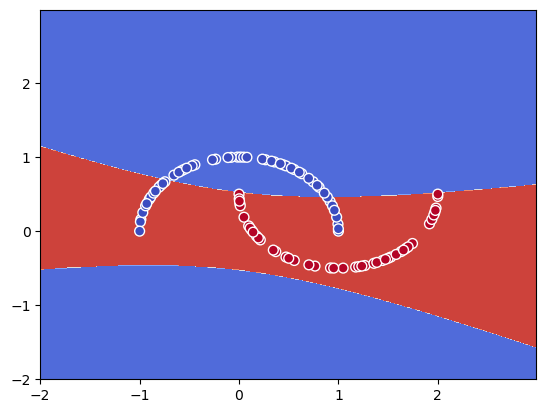

In [6]:
plt.contourf(xx, yy, svm_poly_pred, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
plt.show()

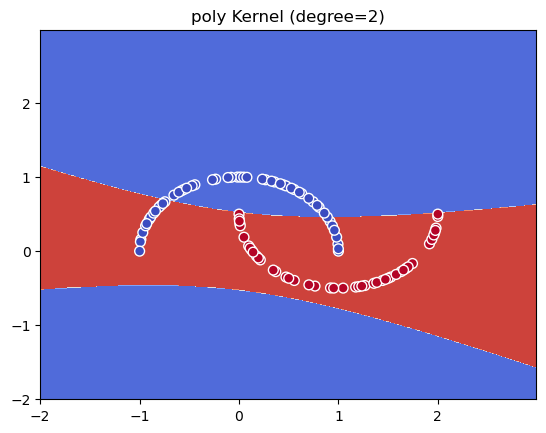

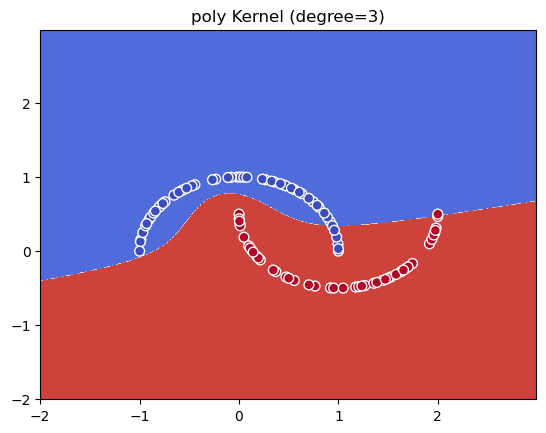

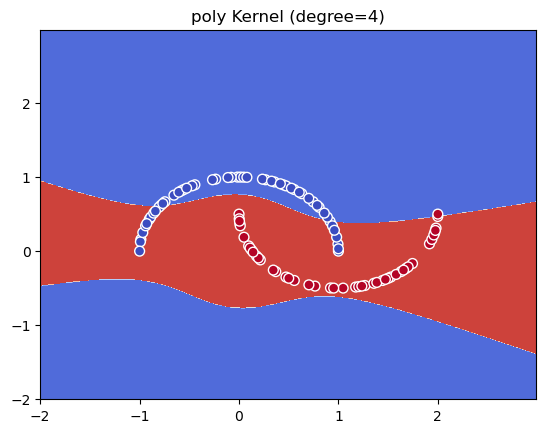

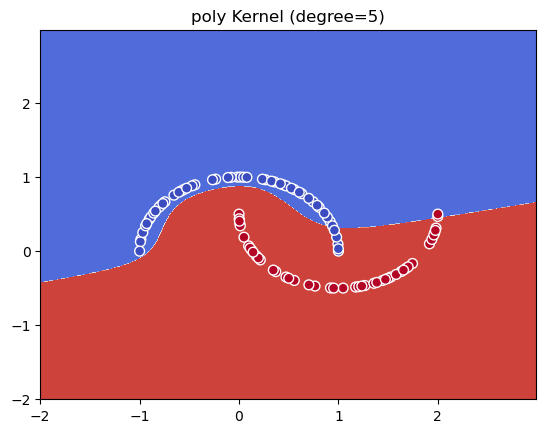

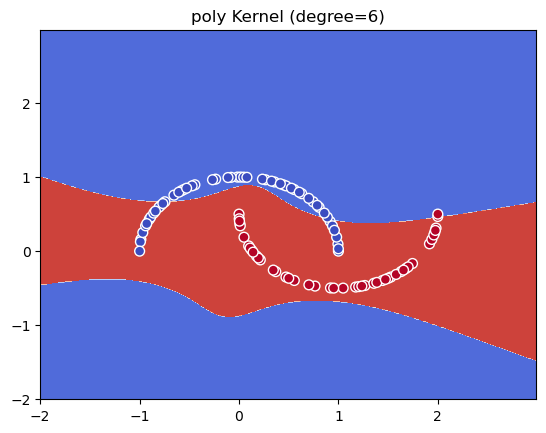

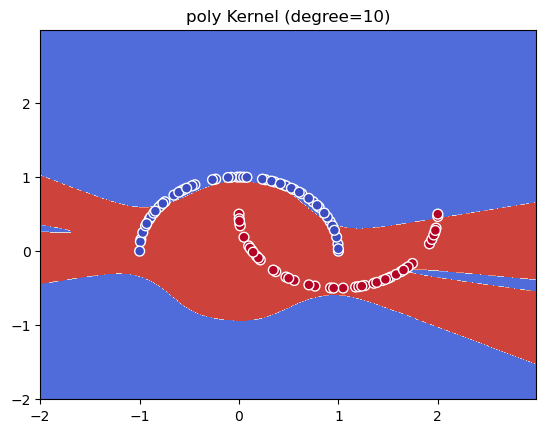

In [14]:
d_list = [2,3,4,5,6, 10]
for degree in d_list:
    svm_poly = SVC(C=5, kernel='poly', degree=degree)
    svm_poly.fit(X_train, y_train)
    svm_poly_pred = svm_poly.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, svm_poly_pred, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
    plt.title("poly Kernel (degree={})".format(degree))
    plt.show()

### RBF method:

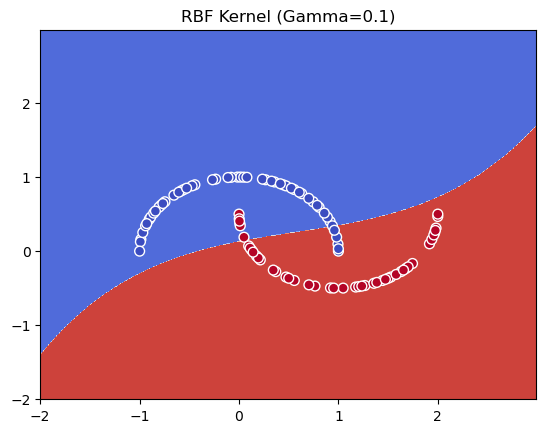

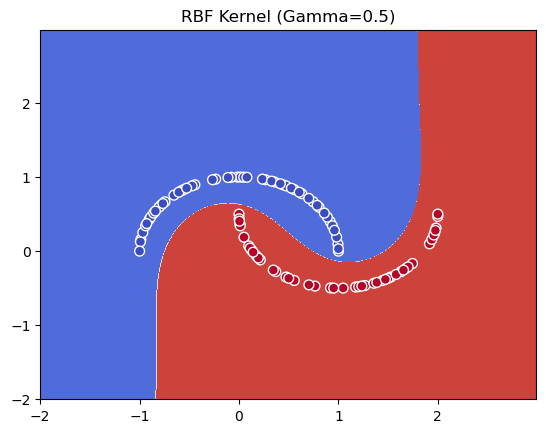

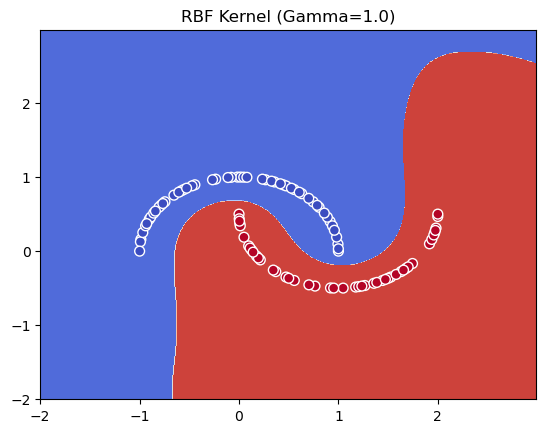

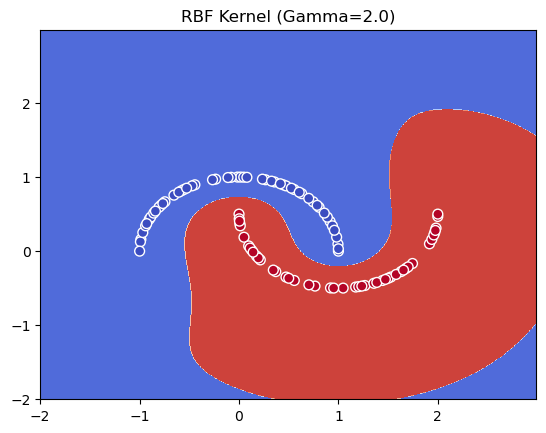

In [15]:
gamma_values = [0.1, 0.5, 1.0, 2.0]

for gamma in gamma_values:
    svm_rbf = SVC(C=5, kernel='rbf', gamma=gamma)
    svm_rbf.fit(X_train, y_train)
    svm_rbf_pred = svm_rbf.predict(grid).reshape(xx.shape)
    plt.contourf(xx, yy, svm_rbf_pred, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
    plt.title("RBF Kernel (Gamma={})".format(gamma))
    plt.show()

### Plot the support vectors:
The support vectors are the samples from the training set that lie closest to the decision boundary and play a crucial role in defining it. it helps to understand which points have the most influence on the decision boundary.

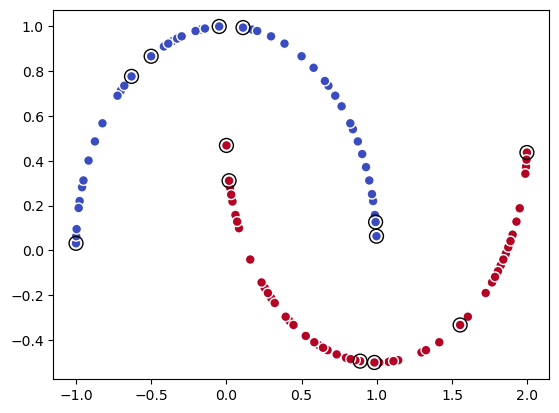

In [11]:
# After fitting the SVM classifier
support_vectors = svm_poly.support_vectors_

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], facecolors='none', edgecolors='black', s=100)
plt.show()

### why a certain kernel behaves a certain way?

#### Polynomial Kernel:
The polynomial kernel transforms the original input data into a higher-dimensional space by applying polynomial functions to the original features. The polynomial kernel allows SVM to capture non-linear relationships between features by considering polynomial combinations of the original features.

degree: Determines the degree of the polynomial function. In this example, the degree 5 shows the better result.

#### RBF Kernel:
The RBF kernel measures the similarity between data points using a Gaussian-like function. The RBF kernel can handle highly non-linear decision boundaries by mapping the data into an infinite-dimensional feature space.

Gamma: Controls the smoothness of the decision boundary. In this example, gamma >= 0.5 shows better results. The more gamma value, the more smoothness of decision boundary.


## Part 2:
Classification metrics are important for measuring the performance of your model. Scikit-learn provides several options such as the classification_report and confusion_matrix functions. Another helpful option is the AUC ROC and precision-recall curve. Try to understand what these metrics mean and give arguments why one metric would be more important then others.

For instance, if you have to predict whether a patient has cancer or not, the number of false negatives is probably more important than the number of false positives. This would be different if we were predicting whether a picture contains a cat or a dog – or not: it all depends on the context. Thus, it is important to understand when to use which metric.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the breast cancer dataset.

Create and train several LogisticRegression and SVM models with different values for their hyperparameters. Make use of the model evaluation techniques that have been described during the plenary part to determine the best model for this dataset. Accompany you elaborations with a conclusion, in which you explicitely interpret these evaluation and describe why the different metrics you are using are important or not. Make sure you take the context of this dataset into account.

#### Steps:
1.Try to understand the dataset globally.

2.Load the data.

3.Exploratory analysis

4.Preprocess data (skewness, normality, etc.)

5.Modeling (cross-validation and training)

In [19]:
# Load the data:
data = pd.read_csv('../data/breast-cancer.csv')
print (data.shape)
data.head(5)

(569, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [21]:
#check balans in perentage using value_counts and normalize =True
data.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [22]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
# clean data
data = data.drop('id',axis=1) # To prepare the data for correlation
# Mapping Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [24]:
float_columns = [x for x in data.columns if x not in ['diagnosis']]

In [38]:
# The correlation matrix
corr_mat = data.corr()
    
corr_mat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.727980,0.415185,0.741996,0.727979,0.358560,0.600909,0.709769,0.781475,0.330499,...,0.786108,0.456903,0.793910,0.784118,0.421465,0.602957,0.679810,0.793566,0.415900,0.324416
radius_mean,0.727980,1.000000,0.318346,0.998017,0.999465,0.152087,0.492571,0.653618,0.797439,0.128959,...,0.975933,0.299314,0.971613,0.975917,0.105461,0.436392,0.549617,0.741947,0.168476,0.000531
texture_mean,0.415185,0.318346,1.000000,0.322669,0.319679,-0.023389,0.237095,0.306604,0.293868,0.071401,...,0.348637,0.912045,0.353002,0.347764,0.077503,0.276816,0.302070,0.295316,0.104075,0.118702
perimeter_mean,0.741996,0.998017,0.322669,1.000000,0.997281,0.188234,0.541800,0.690108,0.823452,0.161561,...,0.976416,0.305471,0.976866,0.976047,0.136902,0.480721,0.587564,0.770810,0.194044,0.046200
area_mean,0.727979,0.999465,0.319679,0.997281,1.000000,0.140885,0.481178,0.647029,0.789748,0.119882,...,0.977022,0.301981,0.972417,0.978046,0.098204,0.429506,0.545970,0.736811,0.162359,-0.006294
smoothness_mean,0.358560,0.152087,-0.023389,0.188234,0.140885,1.000000,0.663873,0.524513,0.555805,0.557775,...,0.201604,0.036072,0.225814,0.188693,0.805324,0.481421,0.436713,0.503053,0.395056,0.501116
compactness_mean,0.600909,0.492571,0.237095,0.541800,0.481178,0.663873,1.000000,0.887457,0.834434,0.600340,...,0.531776,0.249309,0.583683,0.517857,0.571112,0.878121,0.824687,0.820806,0.506257,0.691042
concavity_mean,0.709769,0.653618,0.306604,0.690108,0.647029,0.524513,0.887457,1.000000,0.925341,0.498109,...,0.678598,0.306762,0.716120,0.670378,0.457063,0.778127,0.894757,0.873077,0.411063,0.523907
concave points_mean,0.781475,0.797439,0.293868,0.823452,0.789748,0.555805,0.834434,0.925341,1.000000,0.462297,...,0.817425,0.294542,0.839650,0.808195,0.456938,0.689409,0.772976,0.914746,0.377154,0.374532
symmetry_mean,0.330499,0.128959,0.071401,0.161561,0.119882,0.557775,0.600340,0.498109,0.462297,1.000000,...,0.173206,0.090651,0.202381,0.161543,0.426675,0.472821,0.425368,0.430297,0.704904,0.439321


In [28]:
# The correlation matrix
corr_mat = data[float_columns].corr()

# Strip out the diagonal values for the next step
for x in range(len(float_columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,0.000000,0.318346,0.998017,0.999465,0.152087,0.492571,0.653618,0.797439,0.128959,-0.345094,...,0.975933,0.299314,0.971613,0.975917,0.105461,0.436392,0.549617,0.741947,0.168476,0.000531
texture_mean,0.318346,0.000000,0.322669,0.319679,-0.023389,0.237095,0.306604,0.293868,0.071401,-0.076457,...,0.348637,0.912045,0.353002,0.347764,0.077503,0.276816,0.302070,0.295316,0.104075,0.118702
perimeter_mean,0.998017,0.322669,0.000000,0.997281,0.188234,0.541800,0.690108,0.823452,0.161561,-0.297124,...,0.976416,0.305471,0.976866,0.976047,0.136902,0.480721,0.587564,0.770810,0.194044,0.046200
area_mean,0.999465,0.319679,0.997281,0.000000,0.140885,0.481178,0.647029,0.789748,0.119882,-0.356358,...,0.977022,0.301981,0.972417,0.978046,0.098204,0.429506,0.545970,0.736811,0.162359,-0.006294
smoothness_mean,0.152087,-0.023389,0.188234,0.140885,0.000000,0.663873,0.524513,0.555805,0.557775,0.585325,...,0.201604,0.036072,0.225814,0.188693,0.805324,0.481421,0.436713,0.503053,0.395056,0.501116
compactness_mean,0.492571,0.237095,0.541800,0.481178,0.663873,0.000000,0.887457,0.834434,0.600340,0.563320,...,0.531776,0.249309,0.583683,0.517857,0.571112,0.878121,0.824687,0.820806,0.506257,0.691042
concavity_mean,0.653618,0.306604,0.690108,0.647029,0.524513,0.887457,0.000000,0.925341,0.498109,0.333889,...,0.678598,0.306762,0.716120,0.670378,0.457063,0.778127,0.894757,0.873077,0.411063,0.523907
concave points_mean,0.797439,0.293868,0.823452,0.789748,0.555805,0.834434,0.925341,0.000000,0.462297,0.167030,...,0.817425,0.294542,0.839650,0.808195,0.456938,0.689409,0.772976,0.914746,0.377154,0.374532
symmetry_mean,0.128959,0.071401,0.161561,0.119882,0.557775,0.600340,0.498109,0.462297,0.000000,0.479810,...,0.173206,0.090651,0.202381,0.161543,0.426675,0.472821,0.425368,0.430297,0.704904,0.439321
fractal_dimension_mean,-0.345094,-0.076457,-0.297124,-0.356358,0.585325,0.563320,0.333889,0.167030,0.479810,0.000000,...,-0.286202,-0.051167,-0.240258,-0.300993,0.505474,0.454654,0.327544,0.175167,0.330029,0.769124


In [29]:
# see with features are highly correlated
# Pairwise maximal correlations
corr_mat.abs().idxmax()

radius_mean                              area_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                           texture_worst
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                        concavity_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                          symmetry_mean
fractal_dimension_se           

In [30]:
# how much are they correlated? Can we eliminate certain features based on high correlations
corr_mat.abs().max()

radius_mean                0.999465
texture_mean               0.912045
perimeter_mean             0.998017
area_mean                  0.999465
smoothness_mean            0.805324
compactness_mean           0.887457
concavity_mean             0.925341
concave points_mean        0.925341
symmetry_mean              0.704904
fractal_dimension_mean     0.769124
radius_se                  0.960671
texture_se                 0.457216
perimeter_se               0.960671
area_se                    0.951101
smoothness_se              0.428325
compactness_se             0.822292
concavity_se               0.822292
concave points_se          0.784603
symmetry_se                0.449103
fractal_dimension_se       0.802681
radius_worst               0.998996
texture_worst              0.912045
perimeter_worst            0.994359
area_worst                 0.998996
smoothness_worst           0.805324
compactness_worst          0.902511
concavity_worst            0.902511
concave points_worst       0

In [25]:
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

In [26]:
import numpy as np
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])

In [27]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])

data.head(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,2.217515,...,1.764045,-1.359293,2.022158,1.794344,1.307686,2.479386,2.003224,2.296076,2.682614,1.939736
1,1,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,0.001392,...,1.706795,-0.369203,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.087084,-0.228740,0.292501
2,1,1.524183,0.456187,1.509470,1.511457,0.942210,1.076890,1.393265,2.021815,0.939685,...,1.490832,-0.023974,1.362620,1.493444,0.527407,1.146233,0.929353,1.955000,1.177854,0.211979
3,1,-0.774335,0.253732,-0.550424,-0.843470,3.283553,3.256221,1.908415,1.460738,2.867383,...,-0.179580,0.133984,-0.130272,-0.494860,3.394275,3.449402,1.907919,2.175786,5.487455,4.813255


In [1]:
# sns.set_context('notebook')
# sns.pairplot(data[float_columns + ['diagnosis']], 
#              hue='diagnosis');

### Warning: I had to make the above code comment because the size of file should be less than 25 mb to be uploade on the github

### ROC
ROC Curve: Plot of False Positive Rate (x) vs. True Positive Rate (y).

ROC analysis does not have any bias toward models that perform well on the minority class at the expense of the majority class—a property that is quite attractive when dealing with imbalanced data.

In [49]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.138030,-2.073335,1.281628,1.130319,1.568466,3.150675,2.567947,2.487638,2.217515,...,1.764045,-1.359293,2.022158,1.794344,1.307686,2.479386,2.003224,2.296076,2.682614,1.939736
1,1,1.711783,-0.353632,1.597721,1.713327,-0.826962,-0.481575,0.011104,0.571874,0.001392,...,1.706795,-0.369203,1.502321,1.737118,-0.375612,-0.411700,-0.077623,1.087084,-0.228740,0.292501
2,1,1.524183,0.456187,1.509470,1.511457,0.942210,1.076890,1.393265,2.021815,0.939685,...,1.490832,-0.023974,1.362620,1.493444,0.527407,1.146233,0.929353,1.955000,1.177854,0.211979
3,1,-0.774335,0.253732,-0.550424,-0.843470,3.283553,3.256221,1.908415,1.460738,2.867383,...,-0.179580,0.133984,-0.130272,-0.494860,3.394275,3.449402,1.907919,2.175786,5.487455,4.813255
4,1,1.652935,-1.151816,1.663405,1.667470,0.280372,0.569623,1.400416,1.438255,-0.009560,...,1.326223,-1.466770,1.355825,1.346061,0.220556,-0.280508,0.700235,0.729259,-0.888983,-0.395358


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [39]:
# Modeling
diagnosis = data['diagnosis']
X = data.drop('diagnosis', axis=1)

In [159]:
from sklearn.model_selection import train_test_split

y_train, y_test,X_train, X_test = train_test_split(diagnosis,X, test_size = 0.2)

In [160]:
# Logistic Regression
# Logistic Regression
lr_params = {
    'C': [0.1, 1.0, 10.0],  # Different values for the regularization parameter C
    'solver': ['liblinear', 'saga']  # Different solvers to use
}

lr_model = GridSearchCV(LogisticRegression(), lr_params, cv=5)
lr_model.fit(X_train, y_train)

C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'solver': ['liblinear', 'saga']})

In [161]:
# Support Vector Machine (SVM)
d_list = [2,3,4,5,6,7,8,9,10]
svm_params = {
    'C': [0.1, 1.0, 10.0],  # Different values for the regularization parameter C
    'kernel': ['linear', 'rbf','poly'], # Different kernel functions to use
    'degree' : d_list 
}

svm_model = GridSearchCV(SVC(), svm_params, cv=5)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'kernel': ['linear', 'rbf', 'poly']})

In [162]:
# Print the best hyperparameters and the accuracy of the models
print("Logistic Regression:")
print("Best hyperparameters:", lr_model.best_params_)
print("Accuracy:", lr_model.best_score_)

print("\nSupport Vector Machine (SVM):")
print("Best hyperparameters:", svm_model.best_params_)
print("Accuracy:", svm_model.best_score_)

Logistic Regression:
Best hyperparameters: {'C': 10.0, 'solver': 'saga'}
Accuracy: 0.9824175824175825

Support Vector Machine (SVM):
Best hyperparameters: {'C': 1.0, 'degree': 2, 'kernel': 'linear'}
Accuracy: 0.9824175824175825


In [175]:
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix

In [164]:
#SVM-poly
clf = SVC(C= 0.1, degree= 3, kernel= 'poly')
clf.fit(X_train, y_train)

SVC(C=0.1, kernel='poly')

In [165]:
#SVM-rbf
clf1 = SVC(C= 0.1, degree= 3, kernel= 'rbf')
clf1.fit(X_train, y_train)

SVC(C=0.1)

In [172]:
#SVM-rbf
clf2 = SVC(C= 1.0, degree= 2, kernel= 'linear')
clf2.fit(X_train, y_train)

SVC(degree=2, kernel='linear')

In [166]:
# Logistic Regression
clf3 = LogisticRegression(C=0.1, solver='saga')
clf3.fit(X_train, y_train)

C:\Users\Mahdiye\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, solver='saga')

In [176]:
y_pred = clf.decision_function(X_test)#poly
y_pred1 = clf1.decision_function(X_test)#rbf
y_pred2 = clf2.decision_function(X_test)#linear
y_pred3 = clf2.decision_function(X_test)#lR

In [180]:
binary_pred = (y_pred > 0).astype(int)

# Calculate the confusion matrix
confusion = confusion_matrix(y_test, binary_pred)
confusion

array([[63,  0],
       [19, 32]], dtype=int64)

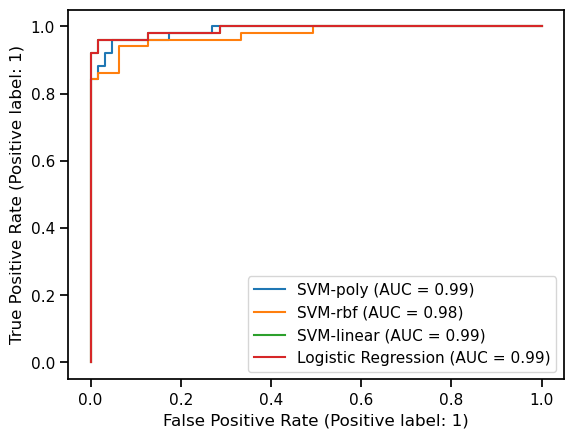

In [174]:
# Create a single plot
fig, ax = plt.subplots()

# Plot the ROC curve for logistic regression
lr_display = RocCurveDisplay.from_predictions(y_test, y_pred, name='SVM-poly', ax=ax)

# Plot the ROC curve for SVM-rbf
poly_display = RocCurveDisplay.from_predictions(y_test, y_pred1, name='SVM-rbf', ax=ax)

# Plot the ROC curve for SVM-linear
poly_display = RocCurveDisplay.from_predictions(y_test, y_pred2, name='SVM-linear', ax=ax)

# Plot the ROC curve for Logistic Regression
rbf_display = RocCurveDisplay.from_predictions(y_test, y_pred3, name='Logistic Regression', ax=ax)

# Add a legend
ax.legend()

# Show the plot
plt.show()

### Explanation:
ROC-AUC stands for Receiver Operating Characteristic - Area Under the Curve.  The ROC-AUC metric summarizes the overall performance of a binary classification model by capturing the trade-off between true positive rate and false positive rate at different classification thresholds. It provides a useful measure to compare and evaluate the performance of different models or different configurations of the same model.



The model with higher accuracy is generally considered better at correctly predicting the target variable. Now here almost all models have better predictions.